# 1. Problem statement

1. To what extent can structured Airbnb data support decision-making frameworks for tourism planning?
2. What analytical frameworks are most suitable for leveraging Airbnb Big Data in strategic tourism planning?
3. How can structured data from Airbnb listings inform the adaptation of prescriptive models for demand forecasting and host behavior analysis in tourism destinations?
4. Can forecasting models built on Airbnb data from one city be applied effectively to other cities for strategic tourism planning?

# 2. Data Collection

In [155]:
pip install "numpy<2" --upgrade

Note: you may need to restart the kernel to use updated packages.


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [157]:
pd.set_option("display.max_columns", None)

In [158]:
df_1 = pd.read_csv("/Users/brigitte/Desktop/Tesis Maestria/Thesis pipeline OG/LONDON/listings.csv", encoding="utf-8")

In [159]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              96651 non-null  int64  
 1   name                            96651 non-null  object 
 2   host_id                         96651 non-null  int64  
 3   host_name                       96611 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   96651 non-null  object 
 6   latitude                        96651 non-null  float64
 7   longitude                       96651 non-null  float64
 8   room_type                       96651 non-null  object 
 9   price                           62684 non-null  float64
 10  minimum_nights                  96651 non-null  int64  
 11  number_of_reviews               96651 non-null  int64  
 12  last_review                     

In [160]:
df_2 = pd.read_csv("/Users/brigitte/Desktop/Tesis Maestria/Thesis pipeline OG/LONDON/listings 2.csv", encoding="utf-8")

In [161]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96651 non-null  int64  
 1   listing_url                                   96651 non-null  object 
 2   scrape_id                                     96651 non-null  int64  
 3   last_scraped                                  96651 non-null  object 
 4   source                                        96651 non-null  object 
 5   name                                          96651 non-null  object 
 6   description                                   93806 non-null  object 
 7   neighborhood_overview                         41983 non-null  object 
 8   picture_url                                   96642 non-null  object 
 9   host_id                                       96651 non-null 

In [162]:
df = df_1.merge(df_2, on="id", how="inner")

In [163]:
df.head()

,id,name_x,host_id_x,host_name_x,neighbourhood_group,neighbourhood_x,latitude_x,longitude_x,room_type_x,price_x,minimum_nights_x,number_of_reviews_x,last_review_x,reviews_per_month_x,calculated_host_listings_count_x,availability_365_x,number_of_reviews_ltm_x,license_x,listing_url,scrape_id,last_scraped,source,name_y,description,neighborhood_overview,picture_url,host_id_y,host_url,host_name_y,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_y,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude_y,longitude_y,property_type,room_type_y,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price_y,minimum_nights_y,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365_y,calendar_last_scraped,number_of_reviews_y,number_of_reviews_ltm_y,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review_y,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license_y,instant_bookable,calculated_host_listings_count_y,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month_y
0,264776,Huge Four Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44306,-0.01948,Entire home/apt,297.0,3,68,2025-05-28,0.51,11,293,12,NaN,https://www.airbnb.com/rooms/264776,20250610032232,2025-06-11,city scrape,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Neighborhood highlights,Lewisham,NaN,51.44306,-0.01948,Entire rental unit,Entire home/apt,10,2.0,2 baths,4.0,8.0,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",$297.00,3,365,3,3,1125,1125,3.0,1125.0,NaN,t,13,15,31,293,2025-06-11,68,12,1,134,15,110,32670.0,2014-07-03,2025-05-28,4.68,4.65,4.72,4.84,4.74,4.62,4.72,NaN,t,11,11,0,0,0.51
1,264777,One Bedroom Apartment,1389063,Sue,NaN,Lewisham,51.44284,-0.01997,Entire home/apt,98.0,3,24,2024-12-11,0.22,11,318,4,NaN,https://www.airbnb.com/rooms/264777,20250610032232,2025-06-11,city scrape,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,NaN,Lewisham,NaN,51.44284,-0.01997,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Wine glasses"", ""Iron"", ""Sm...",$98.00,3,365,3,3,1125,1125,3.0,1125.0,NaN,t,0,13,43,318,2025-06-11,24,4,0,157,7,37,3626.0,2016-07-21,2024-12-11,4.58,4.42,4.54,4.58,4.25,4.54,4.42,NaN,t,11,11,0,0,0.22
2,264778,Two Bedroom Newly Refurbished Apartment,1389063,Sue,NaN,Lewisham,51.44359,-0.02275,Entire home/apt,148.0,3,58,2025-05-01,0.43,11,302,6,NaN,https://www.airbnb.com/rooms/264778,20250610032232,2025-06-11,city scrape,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor

# 3. Data Cleaning

In [164]:
#Dropping duplicate columns

cols = df.columns
cols_x = [c for c in cols if c.endswith("_x")]
cols_y = [c for c in cols if c.endswith("_y")]

df = df.drop(columns= cols_x)

rename_dict = {col: col.replace("_y", "") for col in cols_y}
df = df.rename(columns=rename_dict)

In [165]:
df.head()

,id,neighbourhood_group,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,264776,NaN,https://www.airbnb.com/rooms/264776,20250610032232,2025-06-11,city scrape,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Neighborhood highlights,Lewisham,NaN,51.44306,-0.01948,Entire rental unit,Entire home/apt,10,2.0,2 baths,4.0,8.0,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",$297.00,3,365,3,3,1125,1125,3.0,1125.0,NaN,t,13,15,31,293,2025-06-11,68,12,1,134,15,110,32670.0,2014-07-03,2025-05-28,4.68,4.65,4.72,4.84,4.74,4.62,4.72,NaN,t,11,11,0,0,0.51
1,264777,NaN,https://www.airbnb.com/rooms/264777,20250610032232,2025-06-11,city scrape,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,NaN,Lewisham,NaN,51.44284,-0.01997,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Wine glasses"", ""Iron"", ""Sm...",$98.00,3,365,3,3,1125,1125,3.0,1125.0,NaN,t,0,13,43,318,2025-06-11,24,4,0,157,7,37,3626.0,2016-07-21,2024-12-11,4.58,4.42,4.54,4.58,4.25,4.54,4.42,NaN,t,11,11,0,0,0.22
2,264778,NaN,https://www.airbnb.com/rooms/264778,20250610032232,2025-06-11,city scrape,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50662093/af12...,1389063,https://www.airbnb.com/users/show/1389063,Sue,2011-11-09,United Kingdom,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Neighborhood highlights,Lewisham,NaN,51.44359,-0.02275,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",$148.00,3,365,1,3,1125,1125,3.0,1125.0,NaN,t,3,6,27,302,2025-06-11,58,6,

# 4. Data Preprocessing

In [166]:
# 1st Feature engineering section - column 0 to 10 

#dropping id, host_id, host_url, host_name - features with unique identifier

df_clean = df.drop(columns=["id", "host_id", "host_url", "host_name"])

#host_since: extracting the amount of time that a host is in the platform

df_clean["host_since"] = pd.to_datetime(df_clean["host_since"], errors="coerce")
df_clean["host_tenure_days"] = (datetime.now() - df_clean["host_since"]).dt.days

#host_location: as the information is disperse it will be extracted if the host is from UK (Airbnb location) or not 
# 1 = Host is in UK; 0 = Host is not in the UK; -1 = Host location info is missing 

df_clean["host_is_local"] = df_clean["host_location"].apply(
    lambda x: 1 if isinstance(x,str) and "United Kingdom" in x else(0 if isinstance(x,str) else -1)
)

first_df = df_clean.drop(columns=["host_location"])

In [167]:
# 2nd Feature engineering section

#Price feature - creating price per guest

first_df["price"] = first_df["price"].replace("[\$,]", "", regex=True).astype(float)

first_df["price_per_guest"] = first_df.apply(
    lambda row: round(row["price"] / row["accommodates"], 2) if row ["accommodates"] 
    and row["accommodates"]> 0 else round(row['price'], 2), axis=1
)

#Minimum_nights - creating bins to categorize 

def categorize_min_nights(n):
    if n<= 3:
        return "short_stay"
    elif n<=14:
        return "mid_stay"
    else:
        return "long_stay"
    
first_df["min_nights_category"] = first_df["minimum_nights"].apply(categorize_min_nights)

#dropping engineered features:

second_df = first_df.drop(columns=["minimum_nights", ])

In [168]:
# 3rd Feature engineering section

#Amenities, creating a column whether if the Airbnb listing have or do not have amenities and how many 

import ast

second_df["amenities_list"] = second_df["amenities"].apply(ast.literal_eval)

second_df["amenities_count"] = second_df["amenities_list"].apply(len)
    
#Maximum_nights, adjusting all the nights to maximum a year

max_night_cap = 365

second_df["maximum_nights_capped"] = second_df["maximum_nights"].apply(lambda x: min(x, max_night_cap))
    
#dropping features non needed

third_df = second_df.drop(columns=["amenities", "amenities_list", "maximum_nights"])

In [169]:
# 4th Feature engineering section

#in this section some columns that contain redundant information will be dropped

df_preprocessed = third_df.drop(columns=["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights",
                                  "maximum_maximum_nights", "availability_60", "availability_90"])

In [170]:
# 5th Feature engineering section

#Creating bins for feature: reviews per month

bins = [0, 1, 5, 10, df_preprocessed["reviews_per_month"].max()]
labels = ["0-1", "2-5", "6-10", "11+"]

df_preprocessed["reviews_per_month_bins"] = pd.cut(df_preprocessed["reviews_per_month"], bins=bins, labels=labels, include_lowest=True)

In [171]:
df_preprocessed.head()

,neighbourhood_group,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_tenure_days,host_is_local,price_per_guest,min_nights_category,amenities_count,maximum_nights_capped,reviews_per_month_bins
0,NaN,https://www.airbnb.com/rooms/264776,20250610032232,2025-06-11,city scrape,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/hosting/Hosti...,2011-11-09,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Neighborhood highlights,Lewisham,NaN,51.44306,-0.01948,Entire rental unit,Entire home/apt,10,2.0,2 baths,4.0,8.0,297.0,3.0,1125.0,NaN,t,13,293,2025-06-11,68,12,1,134,15,110,32670.0,2014-07-03,2025-05-28,4.68,4.65,4.72,4.84,4.74,4.62,4.72,NaN,t,11,11,0,0,0.51,5039.0,1,29.70,short_stay,35,365,0-1
1,NaN,https://www.airbnb.com/rooms/264777,20250610032232,2025-06-11,city scrape,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,2011-11-09,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,NaN,Lewisham,NaN,51.44284,-0.01997,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,98.0,3.0,1125.0,NaN,t,0,318,2025-06-11,24,4,0,157,7,37,3626.0,2016-07-21,2024-12-11,4.58,4.42,4.54,4.58,4.25,4.54,4.42,NaN,t,11,11,0,0,0.22,5039.0,1,49.00,short_stay,44,365,0-1
2,NaN,https://www.airbnb.com/rooms/264778,20250610032232,2025-06-11,city scrape,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50662093/af12...,2011-11-09,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Neighborhood highlights,Lewisham,NaN,51.44359,-0.02275,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3.0,148.0,3.0,1125.0,NaN,t,3,302,2025-06-11,58,6,0,141,8,55,8140.0,2014-04-21,2025-05-01,4.50,4.50,4.45,4.72,4.52,4.36,4.38,NaN,t,11,11,0,0,0.43,5039.0,1,37.00,short_stay,27,365,0-1
3,NaN,https://www.airbnb.com/rooms/264779,20250610032232,2025-06-11,city scrape,Refurbished Two Bedroom Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50660860/e440...,2011-11-09,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0

# 5. Data Visualization

## EDA exploration

In [172]:
#Identifying cardinality table for all features

cardinality_df = pd.DataFrame({
    "Feature": df_preprocessed.columns,
    "Unique_values": [df_preprocessed[col].nunique() for col in df_preprocessed.columns]
}).sort_values(by="Unique_values", ascending=False).reset_index(drop=True)

cardinality_df

,Feature,Unique_values
0,listing_url,96651
1,picture_url,94282
2,name,93000
3,description,82842
4,longitude,64050
...,...,...
68,scrape_id,1
69,calendar_updated,0
70,license,0
71,neighbourhood_group_cleansed,0


In [173]:
cardinality_df.to_csv("cardinality_table.csv", index=False)

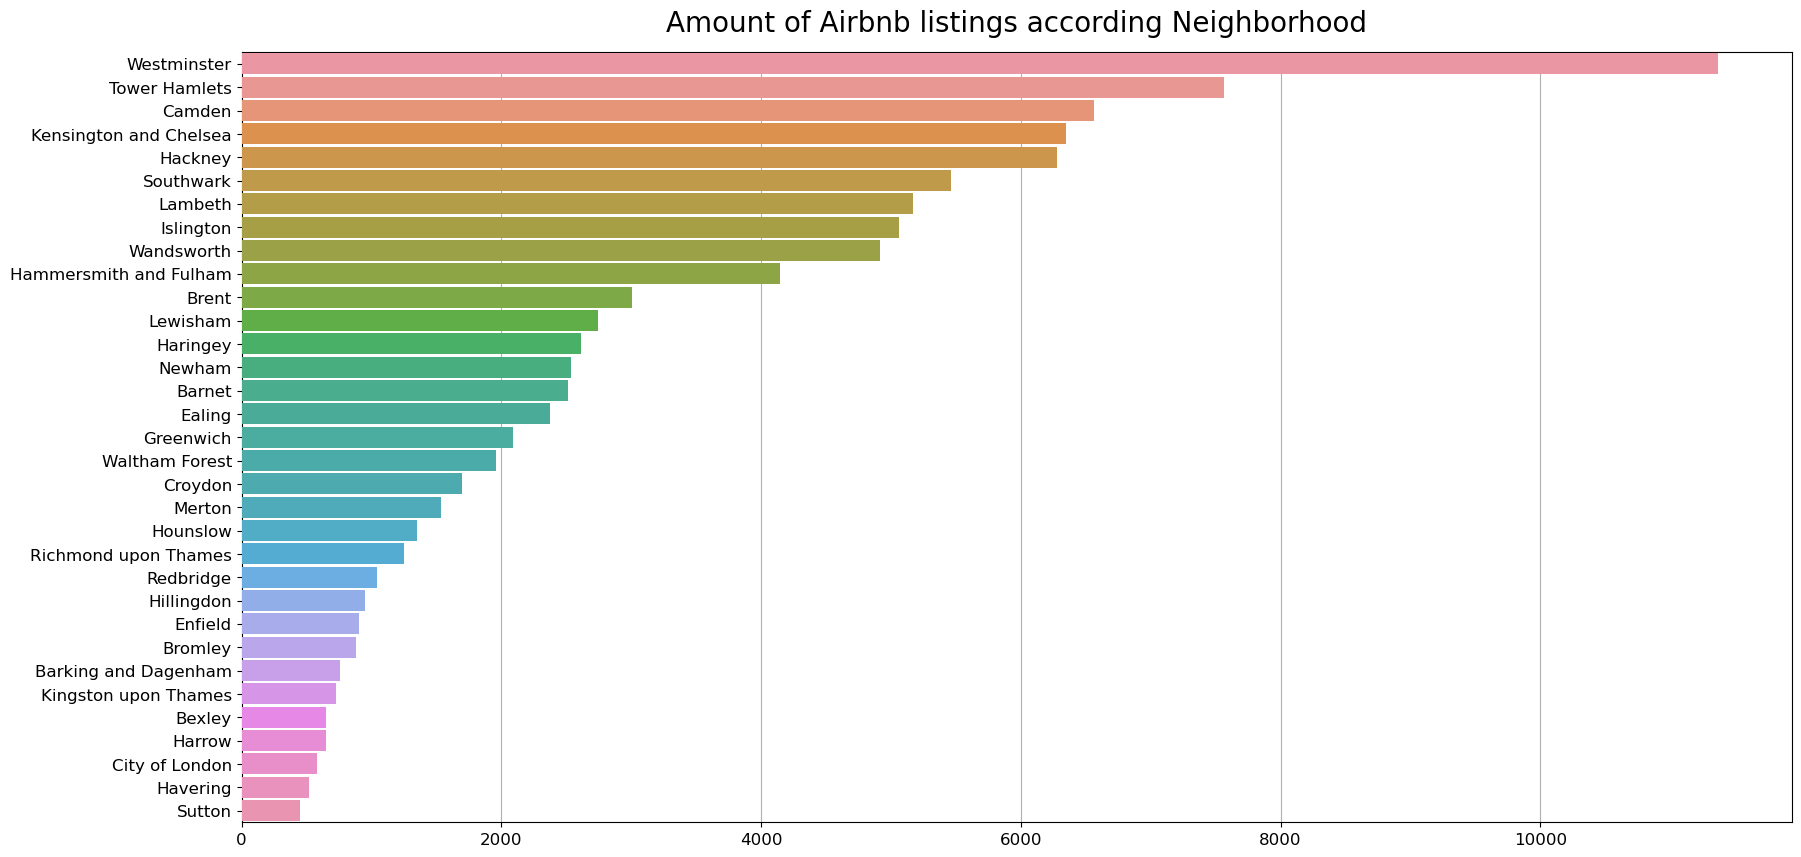

In [174]:
plt.subplots(figsize=(20,10))

order=df_preprocessed["neighbourhood_cleansed"].value_counts().index

sns.countplot(data=df_preprocessed,
            y="neighbourhood_cleansed",
            width=0.9,
            order=order,
            zorder=3
        )

plt.xlabel("", fontsize=15, labelpad=10.0)
plt.ylabel("", fontsize=15, labelpad=10.0)
plt.title("Amount of Airbnb listings according Neighborhood", fontsize=20, pad=15.0)

plt.tick_params(axis="both", which="major", labelsize=12)
plt.xticks(rotation=0)
plt.grid(axis="x", zorder=0)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



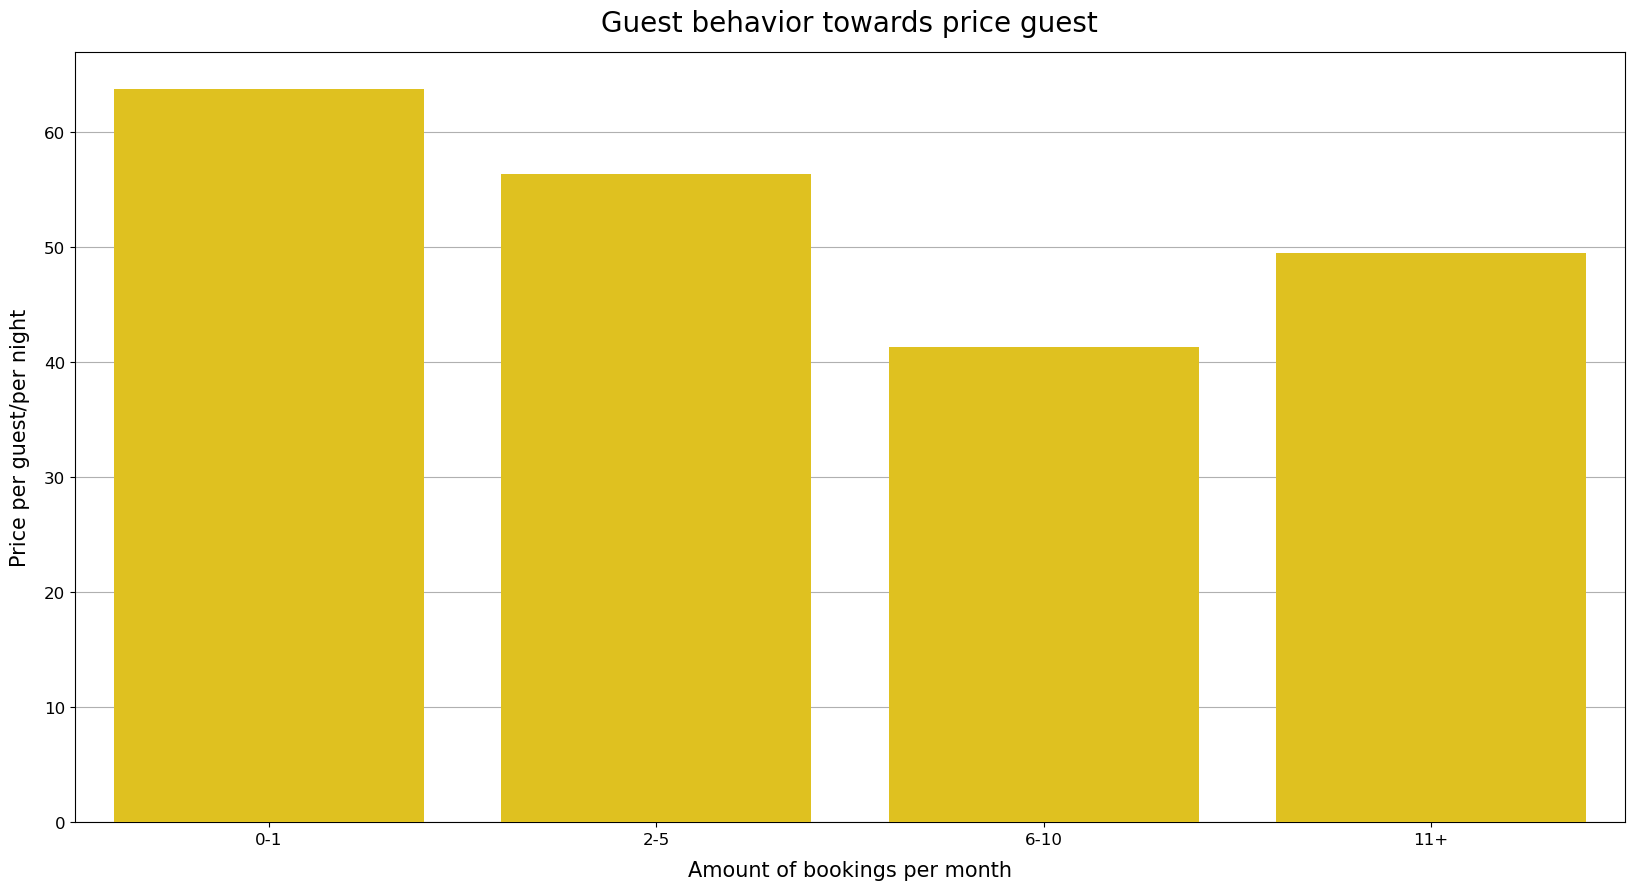

In [175]:
plt.subplots(figsize=(20,10))

sns.barplot(data=df_preprocessed,
            x="reviews_per_month_bins",
            y="price_per_guest",
            errorbar=None,
            color="gold",
            zorder=3
        )

plt.xlabel("Amount of bookings per month", fontsize=15, labelpad=10.0)
plt.ylabel("Price per guest/per night", fontsize=15, labelpad=10.0)
plt.title("Guest behavior towards price guest", fontsize=20, pad=15.0)

plt.tick_params(axis="both", which="major", labelsize=12)
plt.grid(axis="y", zorder=0)
plt.show()

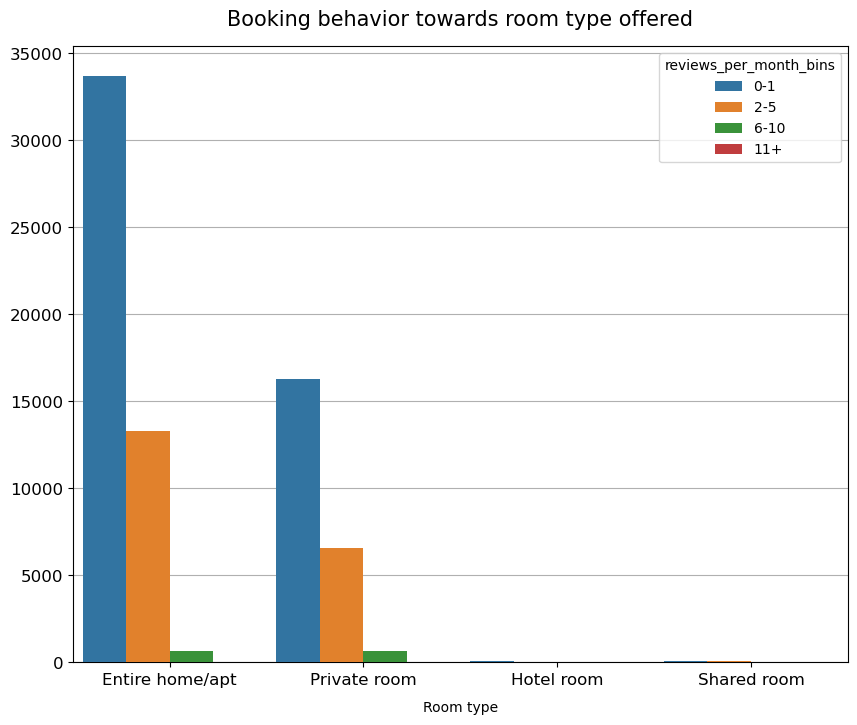

In [176]:
plt.subplots(figsize=(10,8))

sns.countplot(data=df_preprocessed,
            hue="reviews_per_month_bins",
            x="room_type",
            width=0.9,
            zorder=3
        )

plt.xlabel("Room type", fontsize=10, labelpad=10.0)
plt.ylabel("", fontsize=10, labelpad=10.0)
plt.title("Booking behavior towards room type offered", fontsize=15, pad=15.0)

plt.tick_params(axis="both", which="major", labelsize=12)
plt.grid(axis="y", zorder=0)
plt.show()

In [178]:
df_preprocessed.head()

,neighbourhood_group,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_tenure_days,host_is_local,price_per_guest,min_nights_category,amenities_count,maximum_nights_capped,reviews_per_month_bins
0,NaN,https://www.airbnb.com/rooms/264776,20250610032232,2025-06-11,city scrape,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/hosting/Hosti...,2011-11-09,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Neighborhood highlights,Lewisham,NaN,51.44306,-0.01948,Entire rental unit,Entire home/apt,10,2.0,2 baths,4.0,8.0,297.0,3.0,1125.0,NaN,t,13,293,2025-06-11,68,12,1,134,15,110,32670.0,2014-07-03,2025-05-28,4.68,4.65,4.72,4.84,4.74,4.62,4.72,NaN,t,11,11,0,0,0.51,5039.0,1,29.70,short_stay,35,365,0-1
1,NaN,https://www.airbnb.com/rooms/264777,20250610032232,2025-06-11,city scrape,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,2011-11-09,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,NaN,Lewisham,NaN,51.44284,-0.01997,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,98.0,3.0,1125.0,NaN,t,0,318,2025-06-11,24,4,0,157,7,37,3626.0,2016-07-21,2024-12-11,4.58,4.42,4.54,4.58,4.25,4.54,4.42,NaN,t,11,11,0,0,0.22,5039.0,1,49.00,short_stay,44,365,0-1
2,NaN,https://www.airbnb.com/rooms/264778,20250610032232,2025-06-11,city scrape,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50662093/af12...,2011-11-09,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0.muscache.com/im/pictures/user/a0985...,https://a0.muscache.com/im/pictures/user/a0985...,Bellingham,11.0,12.0,"['email', 'phone']",t,t,Neighborhood highlights,Lewisham,NaN,51.44359,-0.02275,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3.0,148.0,3.0,1125.0,NaN,t,3,302,2025-06-11,58,6,0,141,8,55,8140.0,2014-04-21,2025-05-01,4.50,4.50,4.45,4.72,4.52,4.36,4.38,NaN,t,11,11,0,0,0.43,5039.0,1,37.00,short_stay,27,365,0-1
3,NaN,https://www.airbnb.com/rooms/264779,20250610032232,2025-06-11,city scrape,Refurbished Two Bedroom Apartment,A large and sunny two bedroom second floor apa...,Catford is a well established London suburb. T...,https://a0.muscache.com/pictures/50660860/e440...,2011-11-09,I own the Glenthurston Apartments and have don...,within an hour,86%,100%,f,https://a0

In [179]:
df_preprocessed.describe()

,neighbourhood_group,scrape_id,host_since,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_tenure_days,host_is_local,price_per_guest,amenities_count,maximum_nights_capped
count,0.0,9.665100e+04,96613,96613.000000,96613.000000,0.0,96651.000000,96651.000000,96651.000000,62730.000000,84071.000000,62676.000000,62684.000000,96651.000000,9.665100e+04,0.0,96651.000000,96651.000000,96651.000000,96651.000000,96651.000000,96651.000000,96651.000000,96651.000000,6.268400e+04,71487.000000,71472.000000,71478.000000,71443.000000,71466.000000,71442.000000,71442.000000,0.0,96651.000000,96651.000000,96651.000000,96651.000000,71487.000000,96613.000000,96651.000000,62684.000000,96651.000000,96651.000000
mean,NaN,2.025061e+13,2017-12-26 12:33:18.290085376,46.263577,76.334945,NaN,51.509818,-0.127087,3.316520,1.358018,1.603823,1.940966,213.366058,6.287978,2.949694e+05,NaN,8.182709,139.697365,20.891734,5.634665,0.491149,81.856111,5.055095,45.581277,1.106347e+04,4.690699,4.732118,4.653162,4.792937,4.816368,4.733591,4.623804,NaN,16.389370,14.170831,2.164716,0.025763,0.958877,2799.476872,0.472266,65.287877,27.628726,256.531738
min,NaN,2.025061e+13,2008-08-28 00:00:00,1.000000,1.000000,NaN,51.295937,-0.496760,1.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,79.000000,-1.000000,0.940000,0.000000,1.000000
25%,NaN,2.025061e+13,2015-02-07 00:00:00,1.000000,1.000000,NaN,51.484240,-0.189060,2.000000,1.000000,1.000000,1.000000,75.000000,1.000000,9.900000e+01,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4.590000,4.670000,4.520000,4.760000,4.800000,4.650000,4.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.150000,1538.000000,0.000000,31.000000,14.000000,60.000000
50%,NaN,2.025061e+13,2017-01-25 00:00:00,2.000000,3.000000,NaN,51.513791,-0.126990,2.000000,1.000000,1.000000,1.000000,135.000000,2.000000,3.650000e+02,NaN,3.000000,93.000000,4.000000,0.000000,0.000000,68.000000,0.000000,0.000000,2.775000e+03,4.840000,4.880000,4.810000,4.930000,4.970000,4.850000,4.750000,NaN,2.000000,1.000000,0.000000,0.000000,0.500000,3135.000000,1.000000,44.000000,27.000000,365.000000
75%,NaN,2.025061e+13,2021-06-10 00:00:00,9.000000,14.000000,NaN,51.539099,-0.067880,4.000000,1.500000,2.000000,2.000000,225.000000,4.000000,1.125000e+03,NaN,14.000000,270.000000,19.000000,6.000000,0.000000,159.000000,5.000000,56.000000,1.206500e+04,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.950000,NaN,8.000000,5.000000,1.000000,0.000000,1.230000,3853.000000,1.000000,65.000000,39.000000,365.000000
max,NaN,2.025061e+13,2025-06-08 00:00:00,4884.000000,8723.000000,NaN,51.682630,0.278960,16.000000,26.000000,50.000000,50.000000,74100.000000,1125.000000,2.147484e+09,NaN,30.000000,365.000000,1855.000000,355.000000,41.000000,205.000000,303.000000,255.000000,1.479000e+07,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,495.000000,495.000000,116.000000,25.000000,38.410000,6207.000000,1.000000,53588.000000,96.000000,365.000000
std,NaN,3.301970e+01,NaN,357.645418,561.614957,NaN,0.048945,0.100853,2.073674,0.725580,1.041939,1.430231,860.901557,23.0912

## Guest Dimension

In [180]:
import plotly.io as pio

pio.renderers.default = "notebook_connected"

In [181]:
# DBSCAN for Guest dimension

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)

x = df_preprocessed[["reviews_per_month", "availability_eoy", "price_per_guest"]].dropna()

if len(x) >10000:
    x = x.sample(10000, random_state=42)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [182]:
db = DBSCAN(eps=0.8, min_samples=3)
clusters = db.fit_predict(x_scaled)

x["cluster"] = clusters

In [183]:
x["host_response_time"] = df_preprocessed["host_response_time"]

In [203]:
import plotly.express as px

fig = px.scatter(
    x,
    x="availability_eoy",
    y="reviews_per_month",
    color="host_response_time",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"host_response_time": "Response time from host"}
)

fig.update_layout(
    yaxis_title="Amount of reviews per month",
    xaxis_title="Availability until the end of the year"
)

fig.show()

In [185]:
x["host_has_profile_pic"] = df_preprocessed["host_has_profile_pic"]

In [204]:
fig = px.scatter(
    x,
    x="availability_eoy",
    y="reviews_per_month",
    color="host_has_profile_pic",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"host_has_profile_pic": "Status from host profile picture"}
)

fig.update_layout(
    yaxis_title="Amount of reviews per month",
    xaxis_title="Availability until the end of the year"
)

fig.show()

In [187]:
x["host_identity_verified"] = df_preprocessed["host_identity_verified"]

In [205]:
fig = px.scatter(
    x,
    x="availability_eoy",
    y="reviews_per_month",
    color="host_identity_verified",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"host_identity_verified": "Verification of host Identity"}
)

fig.update_layout(
    yaxis_title="Amount of reviews per month",
    xaxis_title="Availability until the end of the year"
)

fig.show()

In [191]:
x["host_tenure_days"] = df_preprocessed["host_tenure_days"]

In [207]:
fig = px.scatter(
    x,
    x="availability_eoy",
    y="reviews_per_month",
    color="host_tenure_days",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"host_tenure_days": "Host tenure days"}
)

fig.update_layout(
    yaxis_title="Amount of reviews per month",
    xaxis_title="Availability until the end of the year"
)


fig.show()

In [208]:
x["review_scores_cleanliness"] = df_preprocessed["review_scores_cleanliness"]

In [209]:
fig = px.scatter(
    x,
    x="availability_eoy",
    y="reviews_per_month",
    color="review_scores_cleanliness",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"review_scores_cleanliness": "Cleanliness: Reviews score"}
)

fig.update_layout(
    yaxis_title="Amount of reviews per month",
    xaxis_title="Availability until the end of the year"
)

fig.show()

In [ ]:
x["review_scores_checkin"] = df_preprocessed["review_scores_checkin"]

In [ ]:
fig = px.scatter(
    x,
    x="availability_eoy",
    y="reviews_per_month",
    color="review_scores_checkin",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"review_scores_checkin": "Check-in: Reviews score"}
)

fig.update_layout(
    yaxis_title="Amount of reviews per month",
    xaxis_title="Availability until the end of the year"
)

fig.show()

In [ ]:
x["review_scores_communication"] = df_preprocessed["review_scores_communication"]

In [ ]:
fig = px.scatter(
    x,
    x="availability_eoy",
    y="reviews_per_month",
    color="review_scores_communication",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"review_scores_communication": "Communication: Reviews score"}
)

fig.update_layout(
    yaxis_title="Amount of reviews per month",
    xaxis_title="Availability until the end of the year"
)

fig.show()

In [ ]:
x["review_scores_location"] = df_preprocessed["review_scores_location"]

In [ ]:
fig = px.scatter(
    x,
    x="availability_eoy",
    y="reviews_per_month",
    color="review_scores_location",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"review_scores_location": "Location: Reviews score"}
)

fig.update_layout(
    yaxis_title="Amount of reviews per month",
    xaxis_title="Availability until the end of the year"
)

fig.show()

In [ ]:
x["review_scores_value"] = df_preprocessed["review_scores_value"]

In [ ]:
fig = px.scatter(
    x,
    x="availability_eoy",
    y="reviews_per_month",
    color="review_scores_value",
    opacity=0.5,
    width=1000,
    height=500,
    labels={"review_scores_value": "Reviews score"}
)

fig.update_layout(
    yaxis_title="Amount of reviews per month",
    xaxis_title="Availability until the end of the year"
)

fig.show()